In [55]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
%pwd
%cd yolov5

!ls

[Errno 2] No such file or directory: 'yolov5'
/Users/sathya/Desktop/Learning/yolov5
CITATION.cff          classify              pyproject.toml
CONTRIBUTING.md       data                  requirements.txt
LICENSE               dataloader_test.ipynb segment
Mask_generation.ipynb detect.py             train.py
README.md             export.py             tutorial.ipynb
README.zh-CN.md       hubconf.py            utils
benchmarks.py         models                val.py


In [57]:
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-393-gab76ab11 Python-3.11.10 torch-2.2.2 CPU


Setup complete ✅ (8 CPUs, 16.0 GB RAM, 494.3/926.4 GB disk)


In [83]:
from utils.dataloaders import LoadImagesAndLabels

dataset = LoadImagesAndLabels('/Users/sathya/Desktop/Learning/Image_Recog/YoloV5/YoloV5_Mask/datasets/coco/',augment=True,hyp = {
    "fl_gamma": 0.0,       # Focal loss gamma
    "hsv_h": 0.015,        # HSV-Hue augmentation
    "hsv_s": 0.7,          # HSV-Saturation augmentation
    "hsv_v": 0.4,          # HSV-Value augmentation
    "degrees": 0.0,        # Rotation
    "translate": 0.1,      # Translation
    "scale": 0.9,          # Scaling
    "shear": 0.0,          # Shearing
    "perspective": 0.0,    # Perspective
    "flipud": 0.0,         # Vertical flip probability
    "fliplr": 0.5,         # Horizontal flip probability
    "mosaic": 1.0,         # Mosaic augmentation probability
    "mixup": 0.1,          # Mixup augmentation probability
    "copy_paste": 0.0      # Copy-paste augmentation probability
})




Scanning /Users/sathya/Desktop/Learning/Image_Recog/YoloV5/YoloV5_Mask/datasets/coco/labels/val2017... 4904 images, 48 backgrounds, 0 corrupt:  99%|█████████▉| 4952/5000 [00:05<00:00, 847.28it/s] 
New cache created: /Users/sathya/Desktop/Learning/Image_Recog/YoloV5/YoloV5_Mask/datasets/coco/labels/val2017.cache


In [78]:
dataset.cache_version

0.8

In [68]:
len(dataset.mask_files)

4952

In [69]:
dataset.label_files[0]

'/Users/sathya/Desktop/Learning/Image_Recog/YoloV5/YoloV5_Mask/datasets/coco/labels/val2017/000000000139.txt'

In [70]:
dataset.mask_files[0]

'/Users/sathya/Desktop/Learning/Image_Recog/YoloV5/YoloV5_Mask/datasets/coco/images/mask/000000000139.png'

In [84]:
dataset[0][0].shape

torch.Size([3, 640, 640])

In [85]:
dataset[0][1].shape

torch.Size([640, 640])

Labels:
tensor([[0.00000e+00, 5.80000e+01, 5.22362e-01, 3.94457e-01, 1.29614e-02, 3.64702e-02],
        [0.00000e+00, 6.20000e+01, 4.34393e-01, 4.14363e-01, 7.83555e-02, 4.97832e-02],
        [0.00000e+00, 6.20000e+01, 7.05266e-01, 4.31869e-01, 4.26883e-02, 4.13136e-02],
        [0.00000e+00, 5.60000e+01, 5.94594e-01, 4.42842e-01, 2.93860e-02, 5.39600e-02],
        [0.00000e+00, 5.60000e+01, 5.60288e-01, 4.41674e-01, 3.24451e-02, 5.16774e-02],
        [0.00000e+00, 5.60000e+01, 6.16268e-01, 4.39811e-01, 1.58318e-02, 4.26937e-02],
        [0.00000e+00, 5.60000e+01, 5.63744e-01, 4.19527e-01, 1.13242e-02, 6.08196e-03],
        [0.00000e+00, 0.00000e+00, 6.22062e-01, 4.20356e-01, 2.78381e-02, 7.24207e-02],
        [0.00000e+00, 0.00000e+00, 5.97223e-01, 4.01184e-01, 7.93424e-03, 1.87546e-02],
        [0.00000e+00, 6.80000e+01, 6.64181e-01, 4.13597e-01, 7.73473e-03, 8.38017e-03],
        [0.00000e+00, 7.20000e+01, 6.55604e-01, 4.21342e-01, 1.06472e-02, 5.68357e-02],
        [0.00000e+00, 7.

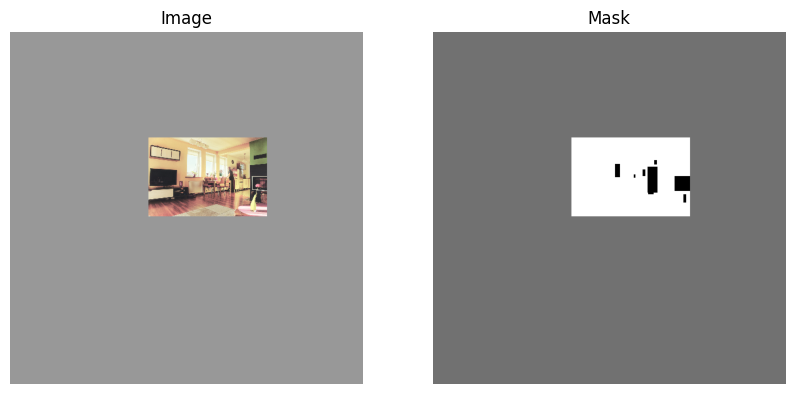

In [88]:
import torch
import matplotlib.pyplot as plt

# Assuming the function returns the following
img_tensor, mask_tensor, labels_out, file_name, shapes = dataset[0]

# Convert tensors to numpy arrays for visualization
img = img_tensor.numpy()
mask = mask_tensor.numpy()

# Convert the image tensor from (C, H, W) to (H, W, C) if it's RGB
if img.ndim == 3:  # RGB image
    img = img.transpose(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)

# No transpose required for mask if it is grayscale
# Just ensure the mask remains a 2D array if it is grayscale
if mask.ndim == 3 and mask.shape[0] == 1:  # Single channel, remove channel dimension
    mask = mask.squeeze(0)  # Convert from (1, H, W) to (H, W)

# Print labels
print("Labels:")
print(labels_out)

# Display the image and mask
plt.figure(figsize=(10, 5))

# Show the image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray' if img.ndim == 2 else None)  # Use grayscale cmap if 2D
plt.title("Image")
plt.axis('off')

# Show the mask
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')  # Always display the mask as grayscale
plt.title("Mask")
plt.axis('off')

plt.show()


In [89]:
len(dataset[10])

5

In [90]:
dataset[101][0]

tensor([[[83, 83, 83,  ..., 83, 83, 83],
         [83, 83, 83,  ..., 83, 83, 83],
         [83, 83, 83,  ..., 83, 83, 83],
         ...,
         [83, 83, 83,  ..., 83, 83, 83],
         [83, 83, 83,  ..., 83, 83, 83],
         [83, 83, 83,  ..., 83, 83, 83]],

        [[83, 83, 83,  ..., 83, 83, 83],
         [83, 83, 83,  ..., 83, 83, 83],
         [83, 83, 83,  ..., 83, 83, 83],
         ...,
         [83, 83, 83,  ..., 83, 83, 83],
         [83, 83, 83,  ..., 83, 83, 83],
         [83, 83, 83,  ..., 83, 83, 83]],

        [[83, 83, 83,  ..., 83, 83, 83],
         [83, 83, 83,  ..., 83, 83, 83],
         [83, 83, 83,  ..., 83, 83, 83],
         ...,
         [83, 83, 83,  ..., 83, 83, 83],
         [83, 83, 83,  ..., 83, 83, 83],
         [83, 83, 83,  ..., 83, 83, 83]]], dtype=torch.uint8)

In [91]:
dataset[1][4]

((640, 586), ((1.0, 1.0), (27.0, 0.0)))